<a href="https://colab.research.google.com/github/Jyoshna0408/CODEVO-Data-Science-tasks/blob/main/Bitcoin_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task - 2
# **BITCOIN PRICE PREDICTION USING MACHINE LEARNING**


**Domain: Data Science**

**Importing Libraries**

In [26]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

**Downloading the Dataset through web**

In [27]:
import yfinance as yf
df = yf.download("BTC-USD", start="2018-01-01", end="2024-09-06")

[*********************100%***********************]  1 of 1 completed


In [28]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072


In [29]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-01,58969.800781,59062.070312,57217.824219,57325.488281,57325.488281,24592449997
2024-09-02,57326.968750,59403.070312,57136.027344,59112.480469,59112.480469,27036454524
2024-09-03,59106.191406,59815.058594,57425.167969,57431.023438,57431.023438,26666961053
2024-09-04,57430.347656,58511.570312,55673.164062,57971.539062,57971.539062,35627680312
2024-09-05,57971.703125,58300.582031,55712.453125,56160.488281,56160.488281,31030280656


In [30]:
df.shape

(2440, 6)

**Plotting the data**

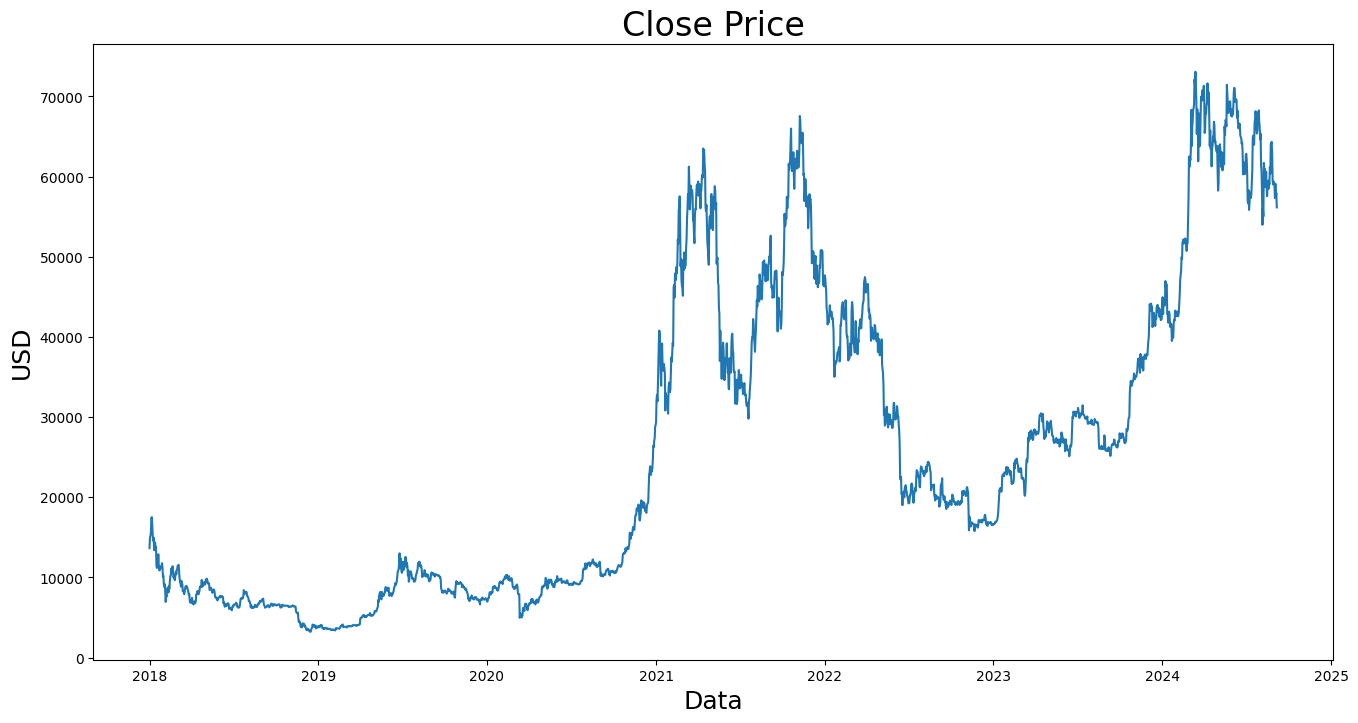

In [31]:
plt.figure(figsize=(16,8))
plt.title('Close Price', fontsize=24)
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('USD', fontsize=18)
plt.show()

In [32]:
#Create a new dataframe with only Close Price
data = df.filter(['Close'])
#Convert the dataframe to numpy array
dataset = data.values
# Get the number of rows to train the model on. we need this number to create our train and test sets
# math.ceil will round up the number
training_data_len = math.ceil(len(dataset) * .8) # We are using %80 of the data for training
training_data_len

1952

**Scaling the Data**

In [33]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.14919005],
       [0.16815872],
       [0.17129273],
       ...,
       [0.77590254],
       [0.78364114],
       [0.75771221]])

**Training the data**

In [34]:
# Creat the training dataset
train_data = scaled_data[0:training_data_len, :]
# Split the data into X_train and y_train data sets
X_train = []
y_train = []

for i in range(60, len(train_data)):
  X_train.append(train_data[i-60: i, 0])
  y_train.append(train_data[i, 0])


  if i <= 60:
    print(X_train)
    print(y_train)
    print()

[array([0.14919005, 0.16815872, 0.17129273, 0.17699378, 0.2031983 ,
       0.20459421, 0.18956988, 0.17085032, 0.16262232, 0.16803273,
       0.14559074, 0.15382018, 0.15925495, 0.15083365, 0.151518  ,
       0.11816927, 0.11384695, 0.11794593, 0.11984294, 0.13833772,
       0.11973842, 0.11016461, 0.10926264, 0.11629231, 0.11486061,
       0.1136007 , 0.11745629, 0.12240426, 0.11539034, 0.09835159,
       0.09999519, 0.08495427, 0.08008947, 0.08501683, 0.07216154,
       0.05323811, 0.06467358, 0.0627737 , 0.07199804, 0.07874697,
       0.07709936, 0.07005636, 0.08146134, 0.07676161, 0.08959428,
       0.09921206, 0.10017846, 0.11276029, 0.10472985, 0.11437239,
       0.11692655, 0.1067142 , 0.09690128, 0.10114056, 0.09415341,
       0.09202962, 0.10207976, 0.10721815, 0.10252646, 0.11044522])]
[0.11238375427449554]



In [35]:
len(X_train)

1892

In [36]:
# Convert the X_train and y_train to numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

In [37]:
X_train.shape

(1892, 60)

In [38]:
# Reshape the data because LSTM needs 3 dim
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # we make it like pros. it wanna say "np.reshape(X_train, (2083, 60, 1))"
X_train.shape

(1892, 60, 1)

In [39]:
# Create the testing dataset
# Create a new array containing scaled values from index 2083
test_data = scaled_data[training_data_len - 60 : , :]

#Create the data sets X_test and y_test
X_test = []
y_test = dataset[training_data_len : , :]
for i in range(60, len(test_data)):
  X_test.append(test_data[i-60 : i, 0])

In [40]:
# Convert the data to a numpy array
X_test = np.array(X_test)

# Reshape the test data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# IMPLEMENTATION AND MODEL EVALUATION OF MACHINE LEARNING MODELS

**1. Linear Regression**

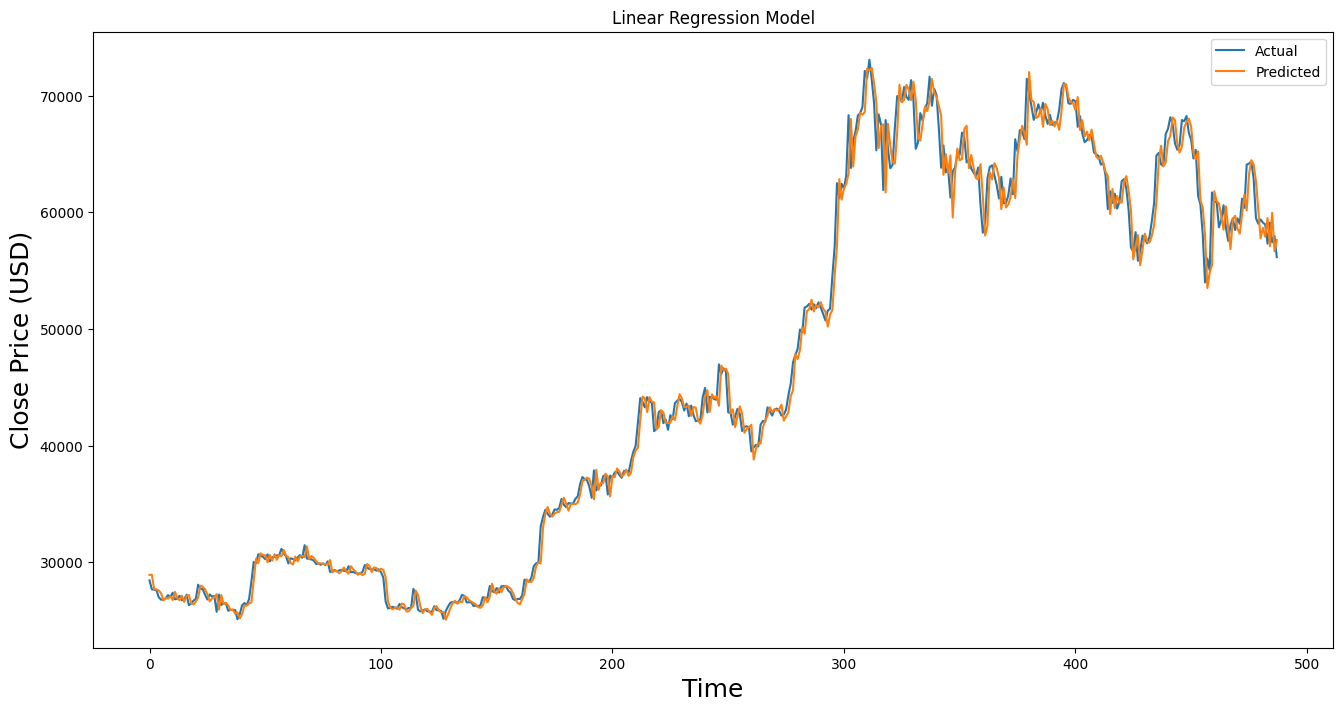

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train.reshape(-1, 60), y_train)
predictions = model.predict(X_test.reshape(-1, 60))
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Plot the predictions against the actual values
plt.figure(figsize=(16,8))
plt.title('Linear Regression Model')
plt.xlabel('Time', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

**Performance Evaluation of Linear Regression**

In [42]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

Mean Squared Error (MSE): 1937871.0371752821
Root Mean Squared Error (RMSE): 1392.0743648150706
R-squared: 0.9926792359931099


**2. Decision Trees**

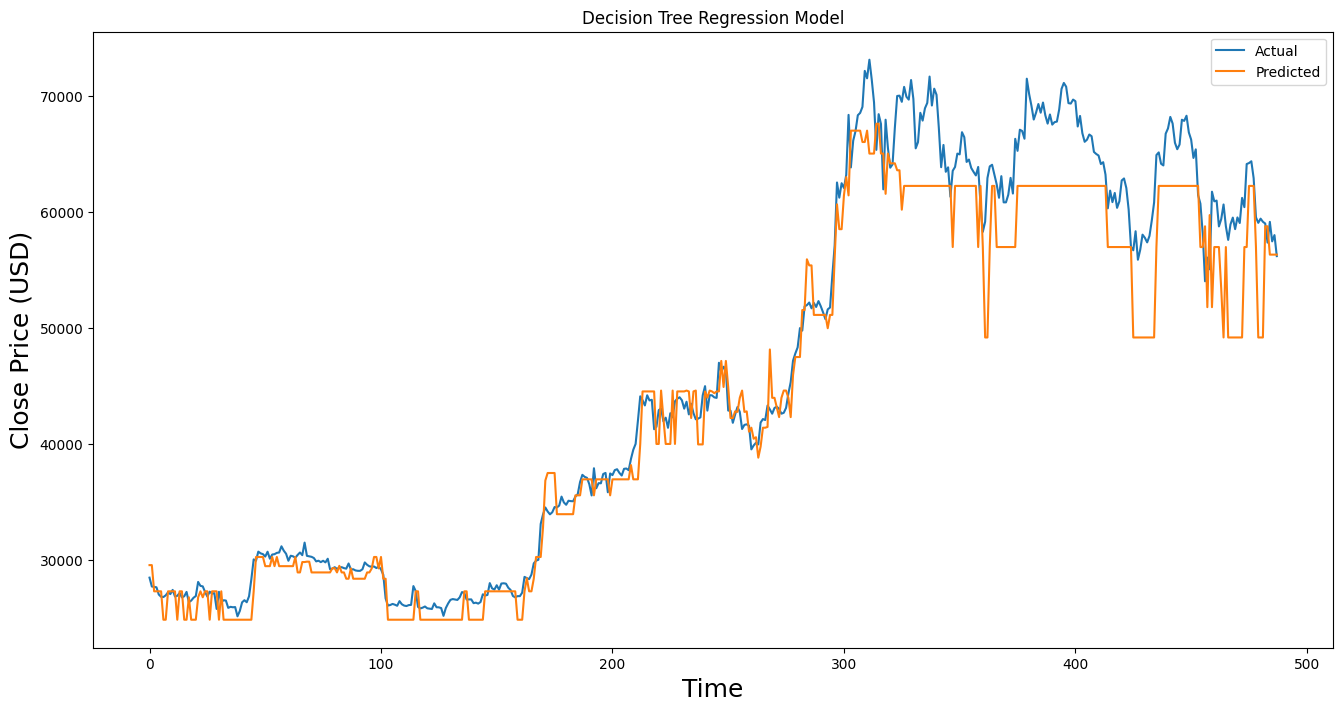

Mean Squared Error (MSE): 14308340.655484987
Root Mean Squared Error (RMSE): 3782.6367332173186
R-squared: 0.9459468750708608


In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train.reshape(-1, 60), y_train)
tree_predictions = tree_model.predict(X_test.reshape(-1, 60))
tree_predictions = scaler.inverse_transform(np.array(tree_predictions).reshape(-1, 1))

# Plot the predictions against the actual values
plt.figure(figsize=(16,8))
plt.title('Decision Tree Regression Model')
plt.xlabel('Time', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)
plt.plot(y_test, label='Actual')
plt.plot(tree_predictions, label='Predicted')
plt.legend()
plt.show()

# Mean Squared Error (MSE)
tree_mse = mean_squared_error(y_test, tree_predictions)
print(f'Mean Squared Error (MSE): {tree_mse}')

# Root Mean Squared Error (RMSE)
tree_rmse = np.sqrt(tree_mse)
print(f'Root Mean Squared Error (RMSE): {tree_rmse}')

# R-squared
tree_r2 = r2_score(y_test, tree_predictions)
print(f'R-squared: {tree_r2}')

**3. XGBoost**

In [43]:
!pip install xgboost

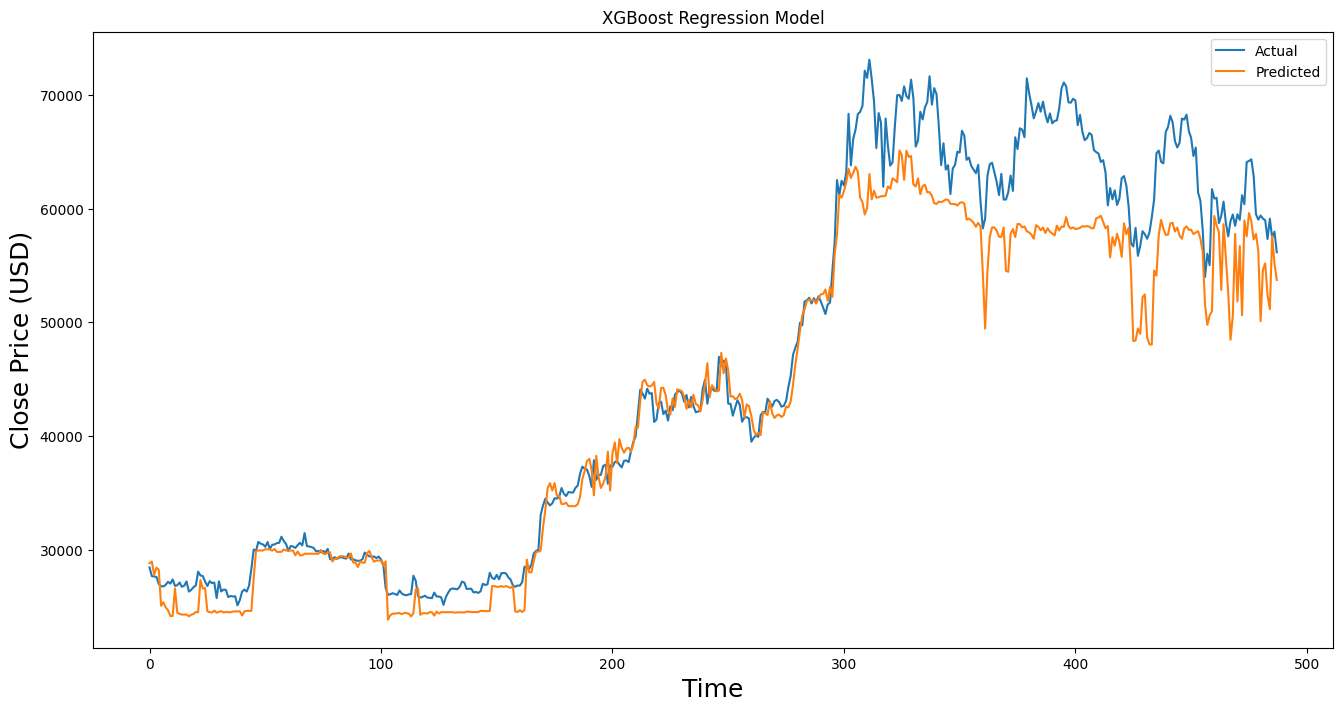

Mean Squared Error (MSE): 21022307.21983346
Root Mean Squared Error (RMSE): 4585.008966167183
R-squared: 0.9205832859440062


In [44]:
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train.reshape(-1, 60), y_train)

xgb_predictions = xgb_model.predict(X_test.reshape(-1, 60))
xgb_predictions = scaler.inverse_transform(np.array(xgb_predictions).reshape(-1, 1))


# Plot the predictions against the actual values
plt.figure(figsize=(16,8))
plt.title('XGBoost Regression Model')
plt.xlabel('Time', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)
plt.plot(y_test, label='Actual')
plt.plot(xgb_predictions, label='Predicted')
plt.legend()
plt.show()

# Mean Squared Error (MSE)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
print(f'Mean Squared Error (MSE): {xgb_mse}')

# Root Mean Squared Error (RMSE)
xgb_rmse = np.sqrt(xgb_mse)
print(f'Root Mean Squared Error (RMSE): {xgb_rmse}')

# R-squared
xgb_r2 = r2_score(y_test, xgb_predictions)
print(f'R-squared: {xgb_r2}')

**Visualization of Bitcoin Prices**

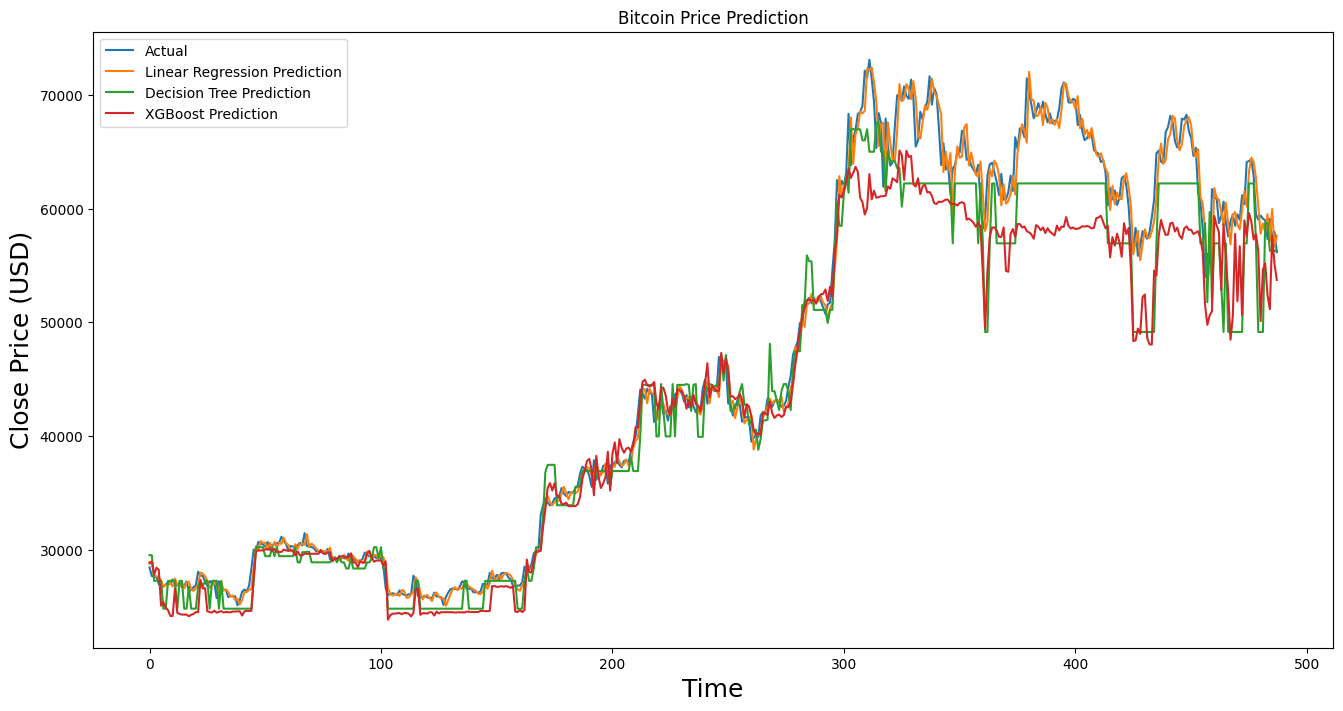

In [45]:
import matplotlib.pyplot as plt

# Plot the predictions against the actual values
plt.figure(figsize=(16, 8))
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Linear Regression Prediction')
plt.plot(tree_predictions, label='Decision Tree Prediction')
plt.plot(xgb_predictions, label='XGBoost Prediction')
plt.legend()
plt.show()

***This task finally predicts the bitcoin prices against actual prices.***